In [2]:
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest) # rvest makes scraping easier
library(polite) # polite is the "polite" version of rvest
library(xml2) # makes it easier to work with HTML and XML from R
library(ggplot2)
library(httr)
library(visdat)
library(skimr)
library(zoo)

In [3]:
HH_LC_PI_df <- read_csv(file = "data/household-living-costs-price-indexes-June-2021-quarter-time-series-indexes.csv")

Rows: 45262 Columns: 11

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): hlpi_name, series_ref, quarter, hlpi, nzhec, nzhec_name, nzhec_shor...
dbl (3): index, change.q, change.a


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [58]:
HH_LC_PI_df %>% head()

hlpi_name,series_ref,quarter,hlpi,nzhec,nzhec_name,nzhec_short,level,index,change.q,change.a
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
All households,HPIQ.SALL01,2008Q2,allhh,1,Food,Food,group,870,NA,NA
All households,HPIQ.SALL01,2008Q3,allhh,1,Food,Food,group,903,3.8,NA
All households,HPIQ.SALL01,2008Q4,allhh,1,Food,Food,group,918,1.7,NA
All households,HPIQ.SALL01,2009Q1,allhh,1,Food,Food,group,927,1.0,NA
All households,HPIQ.SALL01,2009Q2,allhh,1,Food,Food,group,935,0.9,7.5
All households,HPIQ.SALL01,2009Q3,allhh,1,Food,Food,group,949,1.5,5.1


In [60]:
CPI_PRF <- HH_LC_PI_df %>% 
    filter(
        hlpi_name == "All households", 
        nzhec_name == "Petrol"| (nzhec_short == "Rent" & level == "subgroup") | nzhec_name == "Food" | nzhec_name == "All groups"
    ) %>%
    select(quarter, nzhec_short, index) %>%
#     add_row(tibble(nzhec_short = "Avg", HH_LC_PI_df %>% 
#         filter(hlpi_name == "All households") %>%
#         group_by(quarter) %>% 
#         summarise(index = mean(index)))) %>%
    spread(key = nzhec_short, value = index)

CPI_PRF %>% head()

quarter,All groups,Food,Petrol,Rent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2008Q2,898,870,915,895
2008Q3,911,903,957,902
2008Q4,906,918,743,906
2009Q1,903,927,736,908
2009Q2,905,935,760,910
2009Q3,914,949,775,912


In [55]:
write.csv(CPI_PRF, "data/Wrangled_CPI.csv")

geom_line: na.rm = FALSE, orientation = NA
stat_identity: na.rm = FALSE
position_identity 

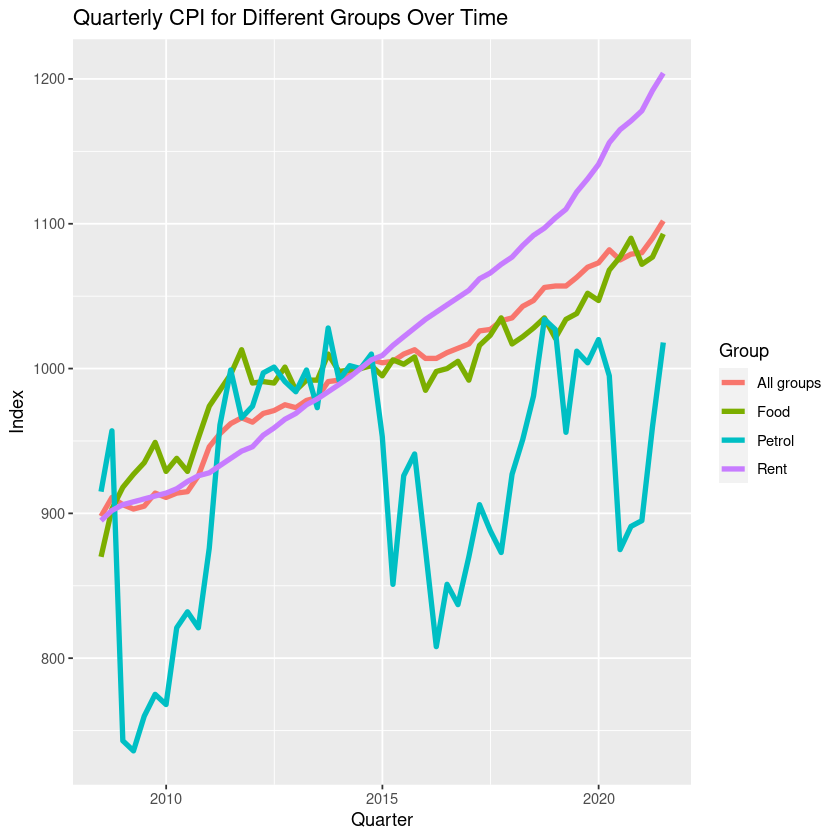

In [71]:
cpi_plot <- CPI_PRF %>%
    gather(key = group, value = index, -quarter) %>%
    arrange(quarter) %>%
    mutate(quarter = as.Date(as.yearqtr(quarter, format = "%YQ%q"), frac = 1)) %>%
    ggplot(mapping = aes(x = quarter, y = index, group = group, colour = group)) +
    scale_colour_discrete("Group") + ggtitle("Quarterly CPI for Different Groups Over Time") +
    ylab("Index") + xlab("Quarter") + geom_line(lwd=1.5)
    geom_line()

cpi_plot

In [48]:
as.Date(as.yearqtr("2011Q2", format = "%YQ%q"))

[1] "2011-04-01"

In [28]:
all_households_petrol <- HH_LC_PI_df %>%
    filter(hlpi_name == "All households", nzhec_name == "Petrol")
all_households_petrol %>% head

hlpi_name,series_ref,quarter,hlpi,nzhec,nzhec_name,nzhec_short,level,index,change.q,change.a
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
All households,HPIQ.SALL07202,2008Q2,allhh,7.2.02,Petrol,Petrol,class,915,NA,NA
All households,HPIQ.SALL07202,2008Q3,allhh,7.2.02,Petrol,Petrol,class,957,4.6,NA
All households,HPIQ.SALL07202,2008Q4,allhh,7.2.02,Petrol,Petrol,class,743,-22.4,NA
All households,HPIQ.SALL07202,2009Q1,allhh,7.2.02,Petrol,Petrol,class,736,-0.9,NA
All households,HPIQ.SALL07202,2009Q2,allhh,7.2.02,Petrol,Petrol,class,760,3.3,-16.9
All households,HPIQ.SALL07202,2009Q3,allhh,7.2.02,Petrol,Petrol,class,775,2.0,-19.0


In [11]:
all_households_rent <- HH_LC_PI_df %>%
    filter(hlpi_name == "All households", nzhec_short == "Rent", level == "subgroup")
all_households_rent %>% head

hlpi_name,series_ref,quarter,hlpi,nzhec,nzhec_name,nzhec_short,level,index,change.q,change.a
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
All households,HPIQ.SALL041,2008Q2,allhh,4.1,Actual rentals for housing,Rent,subgroup,895,NA,NA
All households,HPIQ.SALL041,2008Q3,allhh,4.1,Actual rentals for housing,Rent,subgroup,902,0.8,NA
All households,HPIQ.SALL041,2008Q4,allhh,4.1,Actual rentals for housing,Rent,subgroup,906,0.4,NA
All households,HPIQ.SALL041,2009Q1,allhh,4.1,Actual rentals for housing,Rent,subgroup,908,0.2,NA
All households,HPIQ.SALL041,2009Q2,allhh,4.1,Actual rentals for housing,Rent,subgroup,910,0.2,1.7
All households,HPIQ.SALL041,2009Q3,allhh,4.1,Actual rentals for housing,Rent,subgroup,912,0.2,1.1


In [29]:
all_households_food <- HH_LC_PI_df %>%
    filter(hlpi_name == "All households", nzhec_short == "Food")
all_households_food %>% head

hlpi_name,series_ref,quarter,hlpi,nzhec,nzhec_name,nzhec_short,level,index,change.q,change.a
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
All households,HPIQ.SALL01,2008Q2,allhh,1,Food,Food,group,870,NA,NA
All households,HPIQ.SALL01,2008Q3,allhh,1,Food,Food,group,903,3.8,NA
All households,HPIQ.SALL01,2008Q4,allhh,1,Food,Food,group,918,1.7,NA
All households,HPIQ.SALL01,2009Q1,allhh,1,Food,Food,group,927,1.0,NA
All households,HPIQ.SALL01,2009Q2,allhh,1,Food,Food,group,935,0.9,7.5
All households,HPIQ.SALL01,2009Q3,allhh,1,Food,Food,group,949,1.5,5.1


In [ ]:
HH_LC_PI_df %>%
    filter(nzhec_name == 

In [16]:
HH_LC_PI_df %>%
    filter(hlpi_name == "All households") %>%
    group_by(nzhec_name) %>%
    summarise()

nzhec_name
<chr>
Accommodation services
Actual rentals for housing
Alcoholic beverages
Alcoholic beverages and tobacco
All groups
Audio-visual and computing equipment
Cigarettes and tobacco
Clothing
Clothing and footwear
